Data Description: The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

Domain: Cement manufacturing

Attribute Information:  Cement : measured in kg in a m3 mixture

 Blast : measured in kg in a m3 mixture

 Fly ash : measured in kg in a m3 mixture

 Water : measured in kg in a m3 mixture

 Superplasticizer : measured in kg in a m3 mixture  Coarse Aggregate : measured in kg in a m3 mixture  Fine Aggregate : measured in kg in a m3 mixture  Age : day (1~365)  Concrete compressive strength measured in MPa

Objective: Modeling of strength of high performance concrete using Machine Learning

Deliverable -1 a. Univariate analysis (5 marks) i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [164]:
#Importing Libraries
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
#suppressing python warnings (eg. for future deprecation, etc.)
import warnings
warnings.filterwarnings("ignore")

In [165]:
#Ans1 : Reading Datafile into dataframe and printing its shape

In [166]:
#Reading Data File in Python
dataset = pd.read_csv('concrete.csv')#read the file in python
print("Ans1:a:Read the datafile concrete.csv into dataframe named dataset - Done")

Ans1:a:Read the datafile concrete.csv into dataframe named dataset - Done


In [167]:
# Check number of columns and rows in data frame
print("Ans 1:b:Shape of the data is",dataset.shape[0], "rows, ",dataset.shape[1]," columns") 

Ans 1:b:Shape of the data is 1030 rows,  9  columns


In [168]:
dataset.head()# To check first 5 rows of data set

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

Univariate Analysis

In [169]:
print("Ans1a  :Five number analysis :")
dataset.describe()

Ans1a  :Five number analysis :


cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [170]:
# Observations:
#1.we see that the count for every variable is 1030 i.e. there are no missing values
#2. barring superplastic, we see the standard deviation for the variables is quite high
#3. slag,ash and superplastic have null(0)values. we have to check the reason for the same-whether they are the actual readings or null values
#4. age values are in days, strength values are in MPa. rest values are in kg. Hence we will have to scale the data

In [171]:
#Checking the Variation
temp_df=dataset.describe()
temp_col=[]
for i in range(len(temp_df.columns)):
    temp_col.append(temp_df.iloc[2,i]/temp_df.iloc[1,i]) # mean/std
temp_df.loc['stdbymean'] = temp_col
print("Ratio of std to mean showing the variation in data:")
print(temp_df['stdbymean':])

Ratio of std to mean showing the variation in data:
             cement      slag      ash    water  superplastic  coarseagg  \
stdbymean  0.371687  1.167581  1.18101  0.11761      0.962799   0.079918   

            fineagg      age  strength  
stdbymean  0.103643  1.38342  0.466407  


In [172]:
#Observations
#variation is extremely high for slag, ash, superplastic and age
#variation is low for water and fineagg, extremely low for coarseagg
#variation is medium for strength"

In [173]:
#Check the datatypes of the data set
dtypes1=dataset.dtypes
print("All data is numeric (float). No need to encode or convert to numeric format.\n",dtypes1)

All data is numeric (float). No need to encode or convert to numeric format.
 cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object


In [174]:
dataset.isnull().sum()#to check the null values in the data
#As we can see that there are no null values in the dataset

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [176]:
#Count for every variable is 1030, same as total entries (no. of rows): There are no missing values
#Hence data imputation for missing values not required.

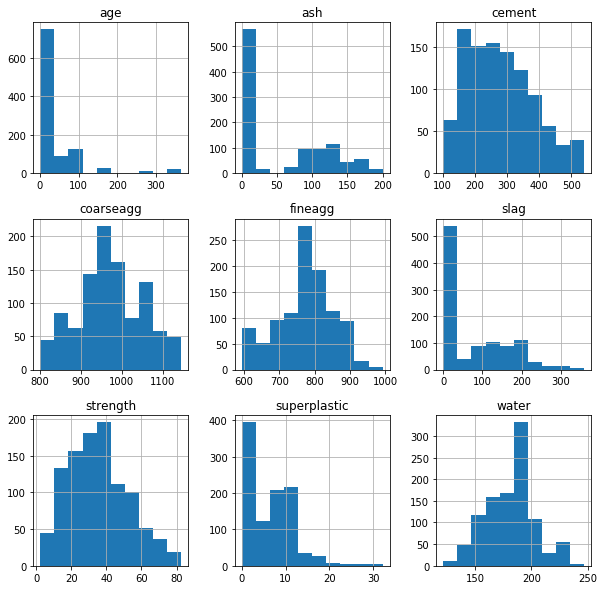

In [177]:
#Univariate Analysis-histgrams of each variable and target column
dataset.hist(figsize=(10,10))
plt.show()

In [178]:
#Check the skewness of the curve
from scipy.stats import skew,kurtosis
print("the skewness for different variables are ",skew(dataset))

the skewness for different variables are  [ 0.50873892  0.79955033  0.53657103  0.07451966  0.90588087 -0.04016115
 -0.25264099  3.26441454  0.41636979]


In [179]:
#we observe that from bar graph and skewness:
#1. the superplastic variable is highly skewed towards the positive side(skewness=3.2644)
#2. we see that age,ash,cement,fineagg and water are positively skewed while strenght is left skewed(negative skewness)
#3.coarseagg and slag are slightly skewed.
#4. In Age,ash,superplastic and slag ,we see that most of the readings are between 0-100.
#5. we see that the target variable,Strength, is uniformly spread with a skewness of -0.252
 

In [180]:
# Check for normal distribution (to enable perform the parametric tests like regression)
print("Ans1 contd.: Univariate analysis. Normality:")
from scipy.stats import shapiro
temp_statp = pd.DataFrame(columns=['variable', 'Shapiro_stat', 'Shapiro_p'])
for col in dataset.columns:
    stat,p=shapiro(dataset[col])
    temp_statp.loc[len(temp_statp)] = [col,round(stat,4),round(p,9)]
print(temp_statp)

Ans1 contd.: Univariate analysis. Normality:
       variable  Shapiro_stat     Shapiro_p
0        cement        0.9590  0.000000e+00
1          slag        0.8124  0.000000e+00
2           ash        0.7620  0.000000e+00
3         water        0.9804  0.000000e+00
4  superplastic        0.8660  0.000000e+00
5     coarseagg        0.9825  1.000000e-09
6       fineagg        0.9807  0.000000e+00
7           age        0.5907  0.000000e+00
8      strength        0.9798  0.000000e+00


In [181]:
#As is apparent from the Shapiro test on all variables, they all have high stat and almost 0 p
#All the variables seem to be from a normally distributed population.Accordingly, they can be used for Regression analysis.

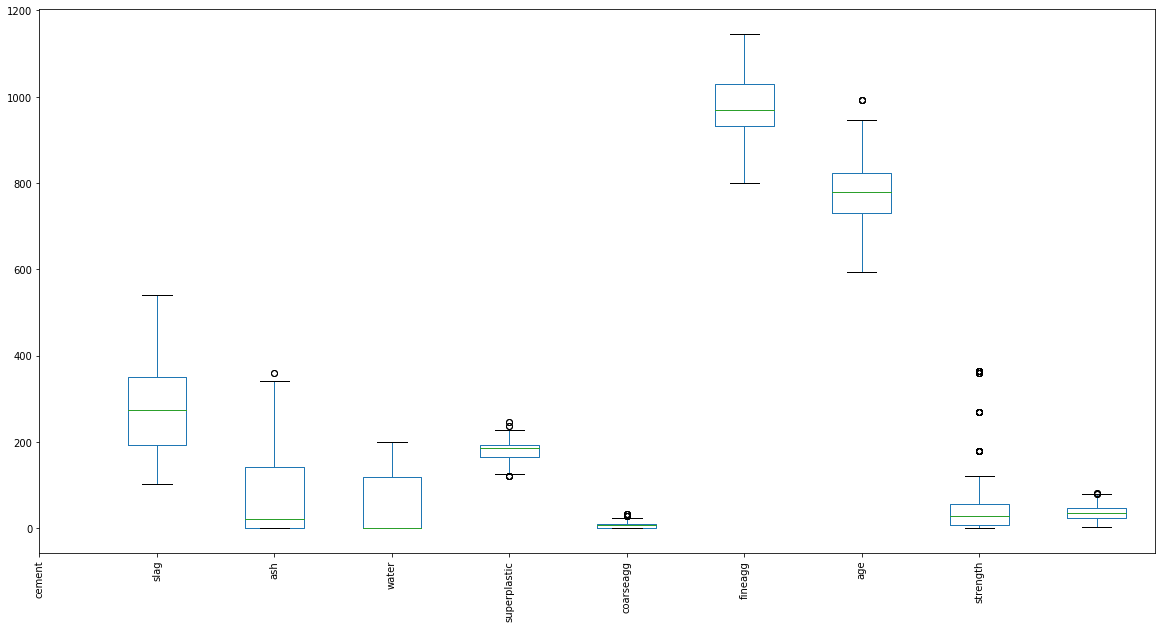

In [182]:
#Plotting Box plots to check the outliers in the data
dataset.plot(kind='box', figsize=(20,10))
plt.xticks(range(len(dataset.columns)),dataset.columns,rotation= "vertical")
plt.show()

In [183]:
#to check the outliers in each column
numdata = dataset.select_dtypes(include=np.number)
for col in numdata:
    outliers=[]
    coldata= numdata[col]    #.to_frame()
    mu = np.mean(coldata) #coldata.mean()
    sigma =np.std(coldata)
    for y in coldata:
        zscore = (y-mu)/sigma
        if np.abs(zscore) > 3: outliers.append(y)
        if np.abs(zscore) < -3: outliers.append(y)
    print("Outliers in ", col, ": ", len(outliers)," of total", len(coldata))
    print(outliers)

Outliers in  cement :  0  of total 1030
[]
Outliers in  slag :  4  of total 1030
[342.1, 342.1, 359.4, 359.4]
Outliers in  ash :  0  of total 1030
[]
Outliers in  water :  2  of total 1030
[247.0, 246.9]
Outliers in  superplastic :  10  of total 1030
[28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2]
Outliers in  coarseagg :  0  of total 1030
[]
Outliers in  fineagg :  0  of total 1030
[]
Outliers in  age :  33  of total 1030
[365, 365, 270, 360, 365, 365, 270, 270, 270, 270, 270, 360, 360, 365, 360, 365, 365, 270, 365, 270, 270, 365, 365, 365, 360, 270, 270, 365, 360, 270, 365, 365, 270]
Outliers in  strength :  0  of total 1030
[]


In [184]:
#As we see there are outliers in the data
#Strategy to handle outliers is to impute their values
#with high boundry value (q75+1.5*iqr) of their columns for high value outliers and with low boundary value 
#(q25-1.5*iqr) for low value outliers
qd = {} #quartile dictionary 
for col in dataset.columns:
    if col != 'strength' : 
        qd[col] = [np.quantile(dataset[col],0.25),np.quantile(dataset[col], 0.50), 
                   np.quantile(dataset[col], 0.75)]
# now for each column,from dataset where a column value is beyond the 1.5 iqr rule,
#imputing the value to the median (50 percentile)
dset=dataset.copy(deep=True)
for col in dataset.columns:
    if col != 'strength':   # excluding the dependent variable from outlier modification
        q25 = qd[col][0]
        q50 = qd[col][1]   #median
        q75= qd[col][2]
        iqr = q75-q25
        lo = q25-(1.5*iqr)
        hi = q75+(1.5*iqr)
        print("        ",col, dset[col][dset[col] <= lo].count()," low value outliers",
        dset[col][dset[col] >= hi].count(),"high value outliers.    all reset to median: ", q50)
        dset[col][dset[col] <= lo] = lo # could set outliers to bounday value (lo) or null np.nan() and delete later 
        dset[col][dset[col] >= hi] = hi # or hi value
    #dset[ (dset[col] <= lo) | (dset[col] >= hi) ].dropna(inplace=True)
    #dataset.drop(dataset[(dataset[col] <= lo) | (dataset[col] >= hi)].index, axis=0, inplace=True) 
    # not dropping row but imputing value
    
#dataset.reset_index(inplace=True)


         cement 0  low value outliers 0 high value outliers.    all reset to median:  272.9
         slag 0  low value outliers 2 high value outliers.    all reset to median:  22.0
         ash 0  low value outliers 0 high value outliers.    all reset to median:  0.0
         water 5  low value outliers 4 high value outliers.    all reset to median:  185.0
         superplastic 0  low value outliers 10 high value outliers.    all reset to median:  6.4
         coarseagg 0  low value outliers 0 high value outliers.    all reset to median:  968.0
         fineagg 0  low value outliers 5 high value outliers.    all reset to median:  779.5
         age 0  low value outliers 59 high value outliers.    all reset to median:  28.0


     Checking elimination of outliers


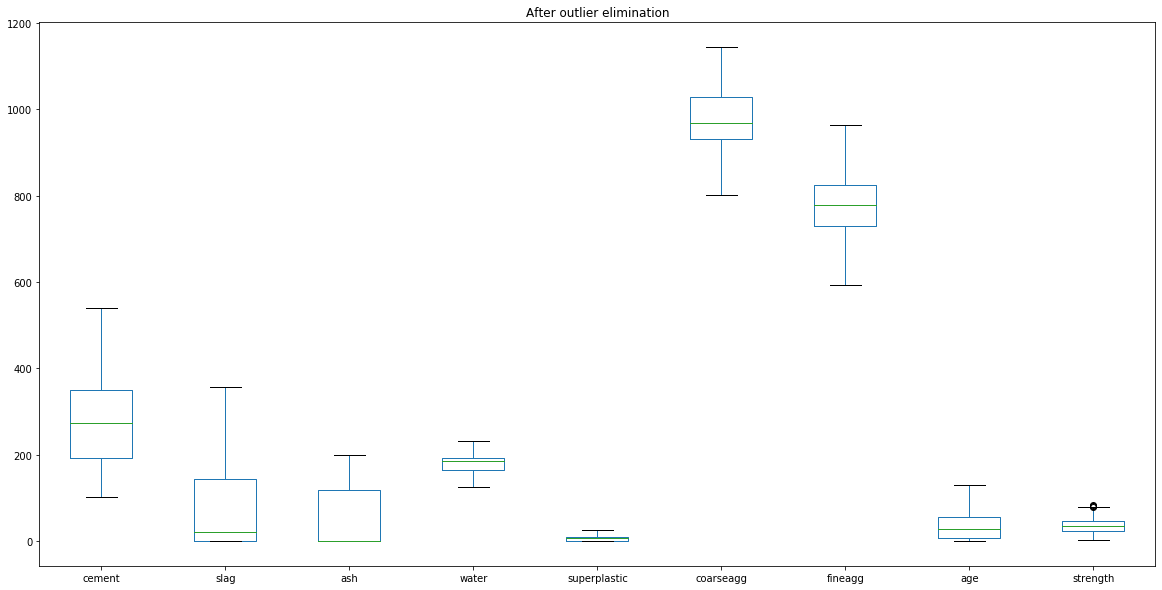

In [185]:
#Plotting Box plots to check the outliers in the data
print("     Checking elimination of outliers")
#dataset.plot(kind='box', figsize=(20,10), title='Before outlier elimination')
dset.plot(kind='box', figsize=(20,10), title='After outlier elimination')
#plt.xticks(range(len(dataset.columns)),dataset.columns,rotation= "vertical")#plt.xticks(range(len(dataset.columns)))
plt.show()

In [186]:
#As we can see now, all the outliers are taken care off and the data is ready for further processing.

1. Deliverable -1 
b. Multivariate analysis (5 marks) i. Bi-variate analysis between the predictor variables and between the predictor 
variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. 
Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select 
the most appropriate attributes

In [187]:
#bivariate plots between strength and other variables

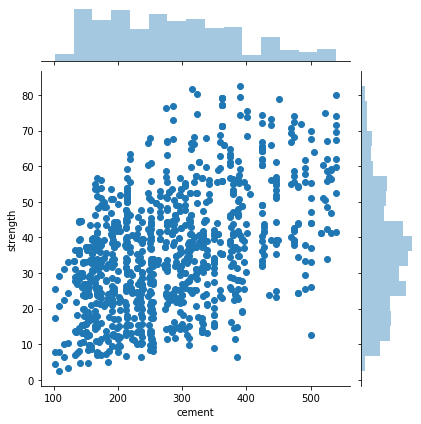

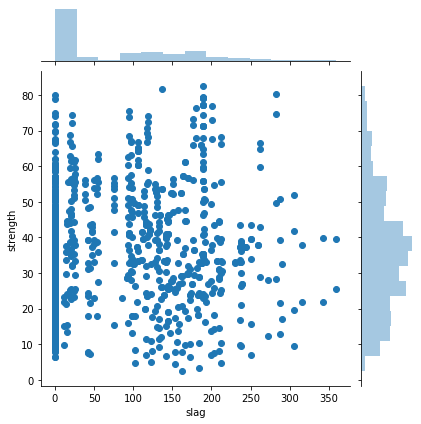

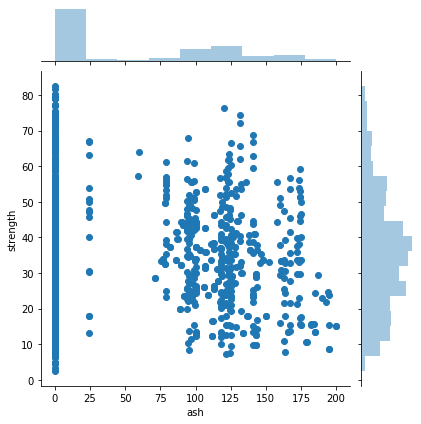

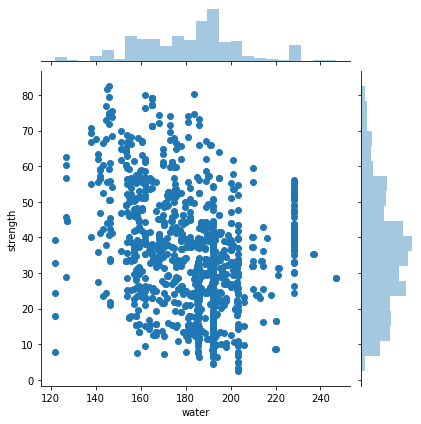

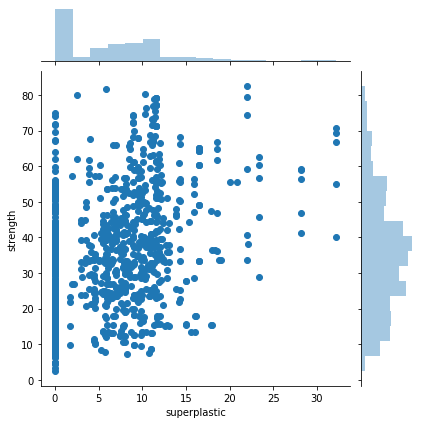

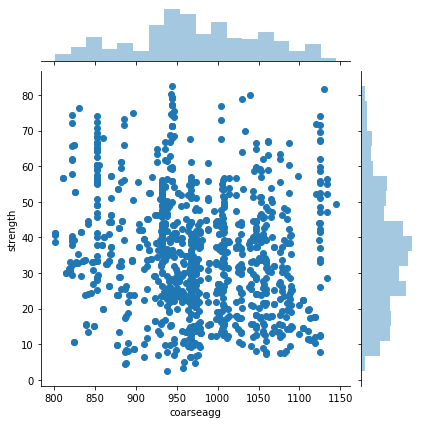

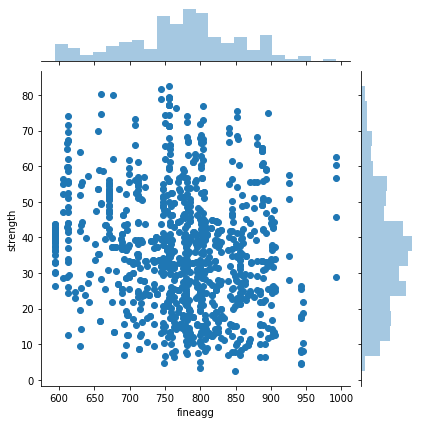

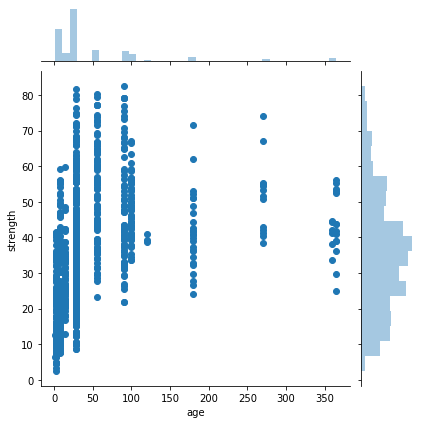

In [188]:
plot_data=dataset.drop(columns = 'strength')
for col in plot_data:
    sns.jointplot(dataset[col],dataset['strength'])

In [189]:
#Observations:
#1.when we see the plot between strength and cement, it makes an eliptical cloud showing some relationship(as below-r=0.49)
#2. With the rest variables and strength we donot see any particular relationship

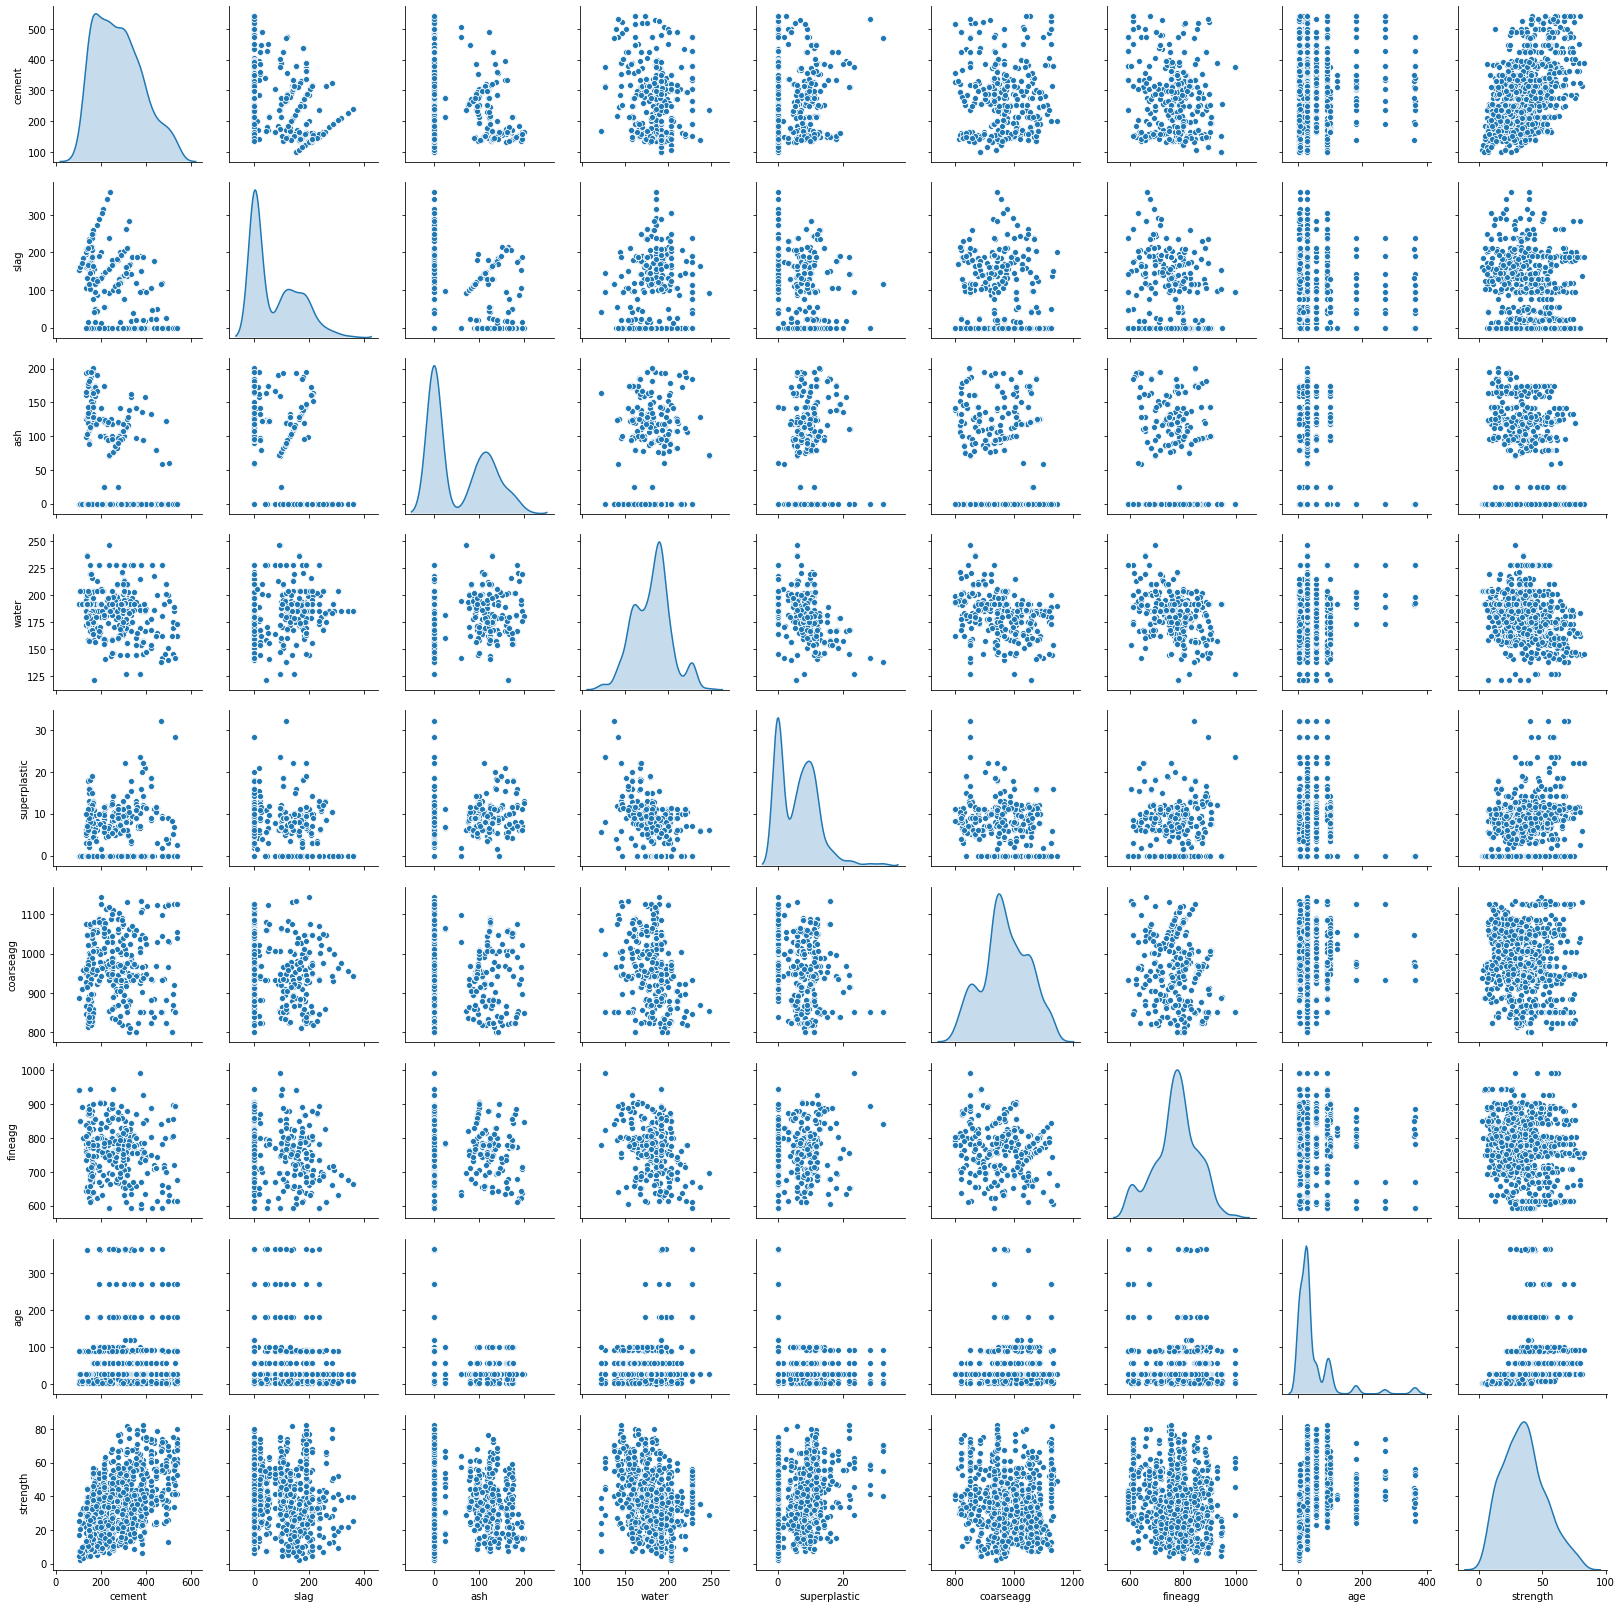

In [190]:
# Now we will do pair plot to find relationship between different variables.
sns.pairplot(dataset,diag_kind='kde')

In [191]:
# observations of the pair plot
#1. we see 3-4 prominent clusters. Although in Age we can see upto 7 clusters
#2.we donot see any prominent relationships between any of the variables.

Ans1b  : Multivariate analysis.Pairwise correlation


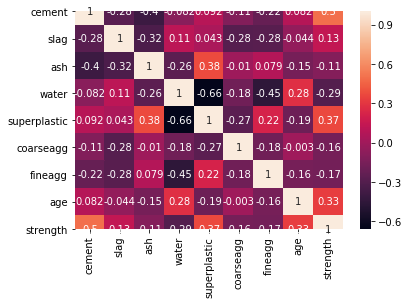

In [192]:
print("Ans1b  : Multivariate analysis.Pairwise correlation")
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [193]:
# We observe that 
#Only superplastic and water are negative correlated(-0.66) 
#pairs (water and fineagg) and (ash and cement) have around 40-45% correlation
#all othe pairs of variables have very low correlations
#so at this stage, we will not drop any variables from consideration

1. Deliverable -1 c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation

In [210]:
#As checked above there are no null values in the data. there are 0 values in data which we will consider as part of the data
# Also for outliers, we have already taken care of the outliers by performing necessary imputation as before.
#Strategy we have used to handle outliers is to impute their values with high boundry value (q75+1.5*iqr) of their columns 
#for high value outliers and with low boundary value (q25-1.5*iqr) for low value outliers

2. Deliverable -2 (Feature Engineering techniques)
a. Identify opportunities (if any) to create a composite feature, drop a feature 
3. Deliverable -3  (create the model )
a. Obtain feature importance for the individual features and present your findings 
(Both Have to be combined as we will find the importance for the individual features using Decision Tree

In [211]:
#Scaling the data
from scipy.stats import zscore
dset_z = dset.apply(zscore)#to convert values to z score to remove different units
dset_z.describe()

cement          slag           ash         water  superplastic  \
count  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03   
mean  -3.858833e-16  3.915961e-16  3.634633e-16  4.909773e-16 -1.237414e-16   
std    1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00   
min   -1.715253e+00 -8.569712e-01 -8.471439e-01 -2.700633e+00 -1.061968e+00   
25%   -8.500535e-01 -8.569712e-01 -8.471439e-01 -7.845134e-01 -1.061968e+00   
50%   -7.915193e-02 -6.018232e-01 -8.471439e-01  1.629408e-01  4.154929e-02   
75%    6.589606e-01  8.009107e-01  1.002278e+00  4.929000e-01  6.967624e-01   
max    2.477915e+00  3.287734e+00  2.281084e+00  2.409020e+00  3.334858e+00   

          coarseagg       fineagg           age      strength  
count  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03  
mean   7.116206e-16  1.200334e-15 -2.931851e-16 -3.729487e-17  
std    1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00  
min   -2.212138e+00 -2.249277e+00 -1.036502e+00 -2.005552e+00  
25%   -5.265174e-01 -5.326075e-01 -8.687398e-01 -7.251305e-01  
50%   -6.329352e-02  7.596735e-02 -2.815719e-01 -8.222491e-02  
75%    7.267605e-01  6.337754e-01  5.013187e-01  6.178744e-01  
max    2.214224e+00  2.383350e+00  2.556406e+00  2.801717e+00

In [212]:
#As we see that mean is close to 0 for all variables and std close to 1. Normalization done

In [213]:
#spliting the data Train and Test
X = dset_z.drop(columns='strength')
y = dset_z['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 10)
#Train Test Data split with 70% data for training
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

Applying the model: Decision Tree Regressor

In [214]:
dt_model = DecisionTreeRegressor()

In [215]:
#Fitting the data in the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [216]:
#printing the importance of the columns
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.303765
slag          0.068850
ash           0.008878
water         0.089373
superplastic  0.107515
coarseagg     0.030166
fineagg       0.080944
age           0.310510


In [217]:
#we see that slag,ash,coarseagg and fineagg have very less importance hence later on we will delete these columns

In [218]:
training_score=dt_model.score(X_train, y_train)
print("Score on training set before deleting the columns",training_score )

Score on training set before deleting the columns 0.9945678506699474


In [219]:
test_score=dt_model.score(X_test, y_test)
print("Score on test set before deleting the columns",test_score)

Score on test set before deleting the columns 0.7596154638220848


In [220]:
# Variables slag,ash,coarseagg and fineagg have extremely low impact (compared with other predictors)
# slag,ash,coarseagg and fineagg will be therefore dropped from training set retain all other variables

In [221]:
drop_cols = ['ash', 'slag','coarseagg','fineagg']
dataset_z=dset_z.drop(columns=drop_cols,axis=1)
X1 = dataset_z.drop(columns='strength' , axis = 1)
y=dataset_z['strength']
X1.shape

(1030, 4)

In [222]:
#creating the model with the 'ash' variable dropped
# Using same y as earlier, but X with 'ash' dropped
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.30, random_state=1)

In [223]:
dt_model = DecisionTreeRegressor()

In [224]:
dt_model.fit(X1_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [225]:
training_score1=dt_model.score(X1_train, y_train)
print("Score on training set after deleting the column",training_score1 )

Score on training set after deleting the column 0.9916757107019986


In [226]:
test_score1=dt_model.score(X1_test, y_test)
print("Score on test set after deleting the column",test_score1 )

Score on test set after deleting the column 0.7399554819486628


In [227]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X1_train.columns))

                   Imp
cement        0.405634
water         0.174012
superplastic  0.069383
age           0.350971


In [228]:
# Findings: dropping the columns has decreased model (test) scores
#The coefficients for standardized predictor variables are listed above
#The intercept is not available from the decision tree regressor model

In [229]:
# Visualize the Decision Tree
from IPython.display import Image  
import pydotplus as pydot
from sklearn import tree
from os import system
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names = list(X1_train),class_names=list(y_train))
graph = pydot.graph_from_dot_data(dot_data)
graph.write_pdf("concrete.pdf")
print("graph saved in concrete.pdf. Since it is a very large graph (x side), one can zoom into the pdf ")
#system("dot -Tpng concrete_tree.dot -o concrete_tree.png")
graph.write_png("concrete.png")
print("graph saved as a picture in concrete.png")

#display the graph
Image(graph.create_png())

graph saved in concrete.pdf. Since it is a very large graph (x side), one can zoom into the pdf 
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.823312 to fit

graph saved as a picture in concrete.png
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.823312 to fit



In [230]:
#Pruning the Decision Tree as it is overfit
dTreeR = DecisionTreeRegressor(max_depth = 5, random_state=10)
dTreeR.fit(X1_train, y_train)
acuracy_decisiontree_tr=dTreeR.score(X1_train, y_train)
print("Acuracy with Pruned Decision Tree on training set is",acuracy_decisiontree_tr)
acuracy_decisiontree=dTreeR.score(X1_test, y_test)
print("Acuracy with Pruned Decision Tree",acuracy_decisiontree)

Acuracy with Pruned Decision Tree on training set is 0.7653618304424312
Acuracy with Pruned Decision Tree 0.664624229304416


graph saved in concrete_pruned.pdf. Since it is a very large graph (x side), one can zoom into the pdf 
graph saved as a picture in concrete_pruned.png


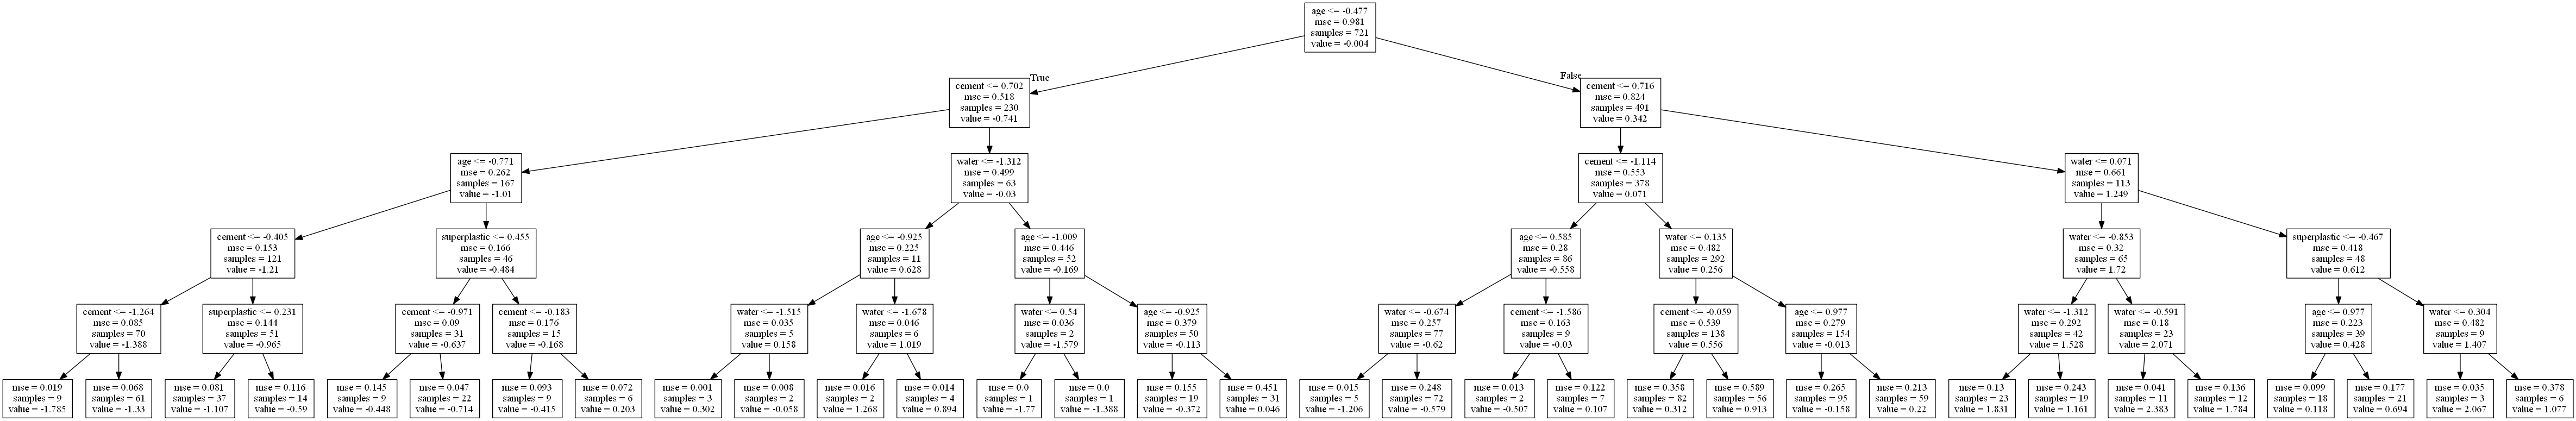

In [232]:
#As we see, the scores have decreases considerably from the original tree but the overfit is some what take care off.
#We can still improve the scores by applying boosting and hyperparameter tuning Algorithms
#Ploting the Pruned Tree
dot_data = tree.export_graphviz(dTreeR, out_file=None, feature_names = list(X1_train),class_names=list(y_train))
graph = pydot.graph_from_dot_data(dot_data)
#graph.write_pdf("concrete_pruned.pdf")
print("graph saved in concrete_pruned.pdf. Since it is a very large graph (x side), one can zoom into the pdf ")
system("dot -Tpng concrete_tree.dot -o concrete_tree.png")
graph.write_png("concrete_pruned.png")
print("graph saved as a picture in concrete_pruned.png")

#display the graph
Image(graph.create_png())

2. Deliverable -2 (Feature Engineering techniques)
b. Decide on complexity of the model, should it be simple linear model in terms of parameters or 
would a quadratic or higher degree help

In [233]:
#Inspecting only the last row of the pairplot drawn earlier, it is apparent that none of the predictor variables seem
#to have a linear relation with strength. The heatmap drawn earlier also shows a very weak correlation between strength 
#and each predictor variable.
#Hence the linear regression model does not seem to be appropriate
# Now Checking for polynomial regression:

# Introducing Polynomial Features to check for quadratic or higher degree help
import sklearn as skl
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [234]:
# linear regression:
model = LinearRegression()
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=10,shuffle=True)
model.fit(X1, y)
y_pred = model.predict(X1_test)
rsquare = r2_score(y_test, y_pred)
linear_score = model.score(X1,y)
print('       Linear regression Rsquare is :', rsquare, "and score is", linear_score)


       Linear regression Rsquare is : 0.6043640696556298 and score is 0.6088162128218211


In [235]:
print('The coefficient and intercept for Linear Reggression are:\n')
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

intercept =model.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient and intercept for Linear Reggression are:

The coefficient for cement is 0.4339456936438673
The coefficient for water is -0.16193820025617178
The coefficient for superplastic is 0.2870299818943095
The coefficient for age is 0.5120399747811912
The intercept for our model is 2.7377492326170433e-16


In [236]:
#Introducing Polynomial Features
poly = PolynomialFeatures(degree = 2, interaction_only=True)
model1=LinearRegression()
y = dset_z['strength']
X1_poly = poly.fit_transform(X1)
model1.fit(X1_poly, y)
X1_train, X1_test, y_train, y_test = train_test_split(X1_poly, y, test_size=0.30, random_state=10)
print(X1_train.shape,y_train.shape)
poly_tr_score=model1.score(X1_train, y_train)
poly_test_score=model1.score(X1_test, y_test)
print('Polynomial Training score is',poly_tr_score)
print('Polynomial Test score is',poly_test_score)

(721, 11) (721,)
Polynomial Training score is 0.6532699306180327
Polynomial Test score is 0.6171956503555478


In [237]:
#As we can see above the performance of the data with Linear Regression and polynomial feature decreases.
#Although Polynomial features perform slightly better than Linear model
#Hence we need not to go for the #polynomial Features. Also the data size is (1030,5) where one is target column.
#There is sufficient data rows to define relationship between the independent variables and dependent variables.
#hence there is no case of curse of Dimensionality.Hence polynomial Features is not required for the data

2. Deliverable -2 (Feature Engineering techniques)
c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings 
in terms of the independent attributes and their suitability to predict strength 

In [238]:
#We will explore the Gaussians with help of Kmeans clustering

In [239]:
#Making the Clusters
#Two columns are removed from normalized dataset('strength' because it is the predictor column) and 'ash' 
#because it was found to have little impact on 'strength' in earlier analysis

from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(dset_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
dataset = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
dataset[0:15]

num_clusters  cluster_errors
0              1     9270.000000
1              2     7590.058301
2              3     6375.468124
3              4     5569.835540
4              5     4970.665627
5              6     4507.672853
6              7     4223.043201
7              8     3947.182029
8              9     3705.388538
9             10     3456.666630
10            11     3264.584429
11            12     3126.342969
12            13     3004.381799
13            14     2889.614228

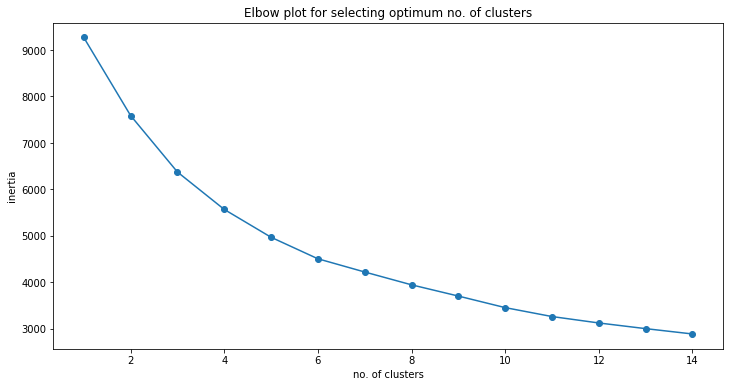

In [240]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( dataset.num_clusters, dataset.cluster_errors, marker = "o" )
plt.title('Elbow plot for selecting optimum no. of clusters')
plt.xlabel('no. of clusters')
plt.ylabel('inertia')
plt.show()

        Graphs showing pairs of 7 predictor variables in 6 clusters with centroids 


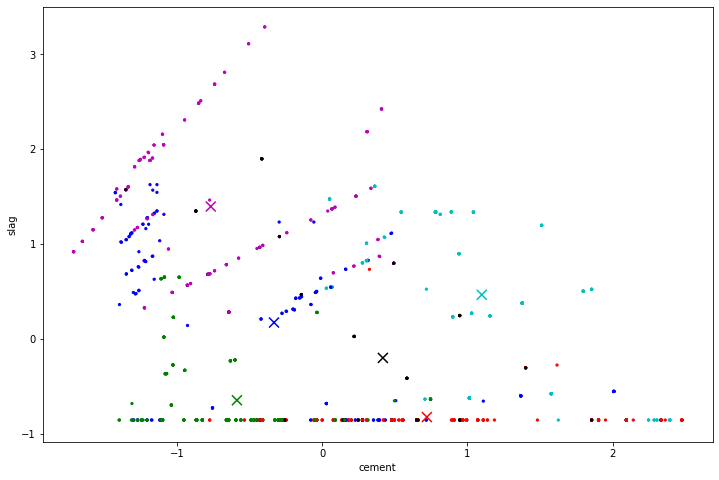

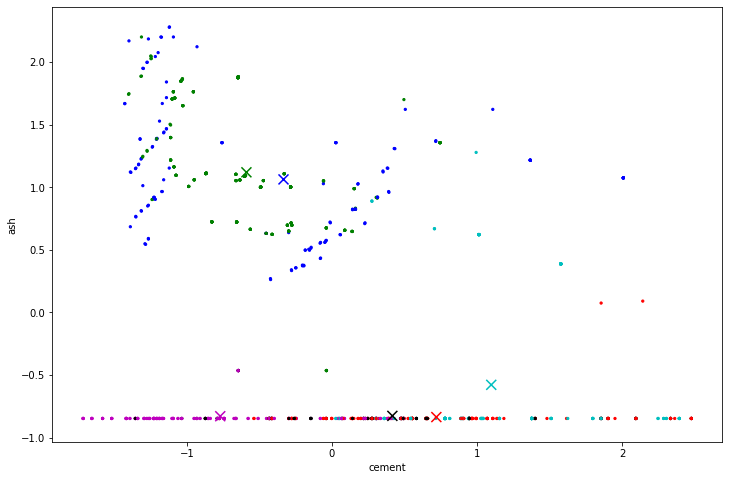

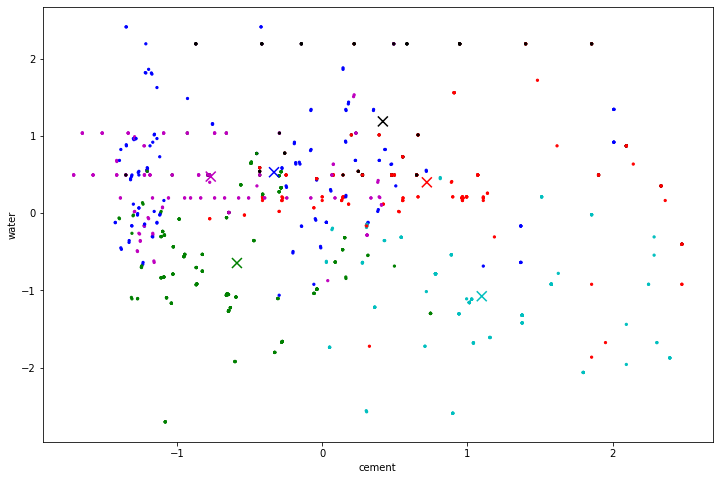

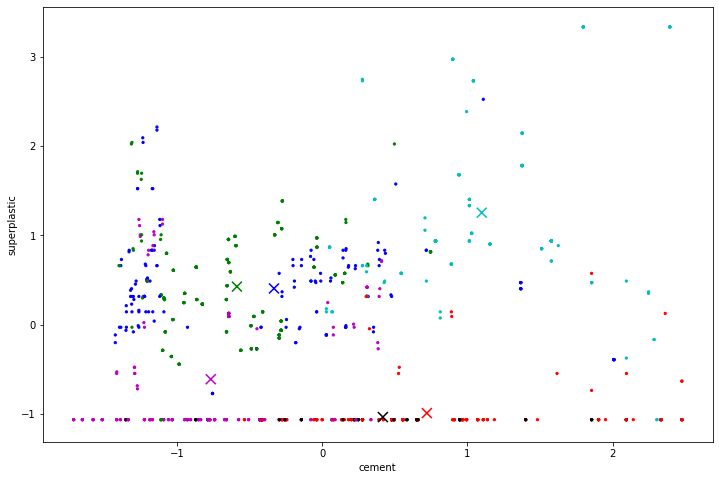

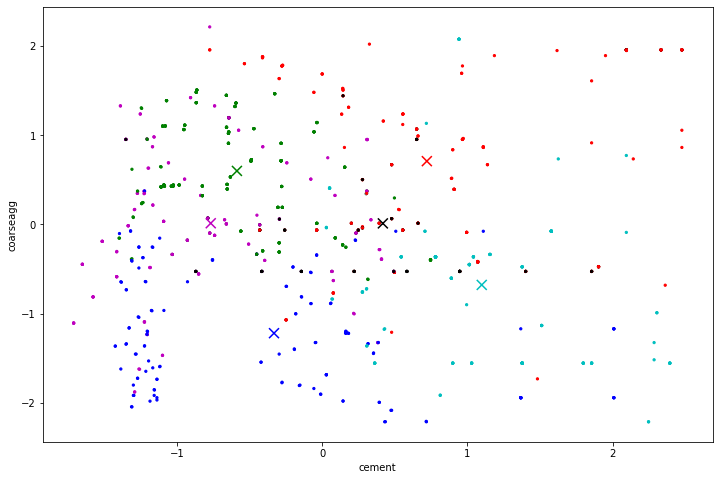

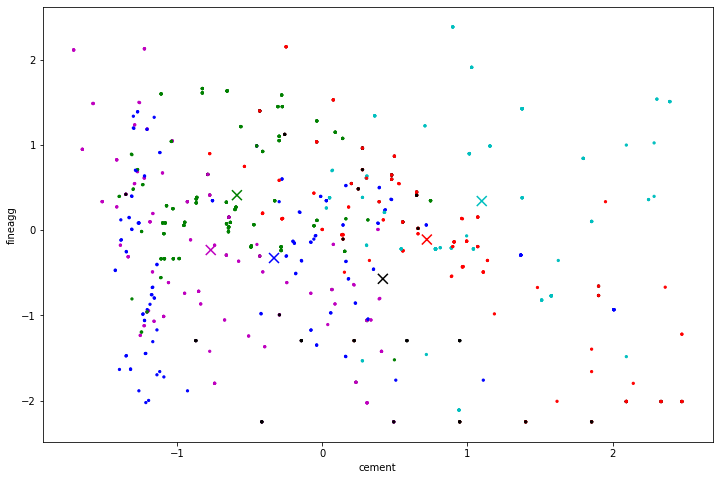

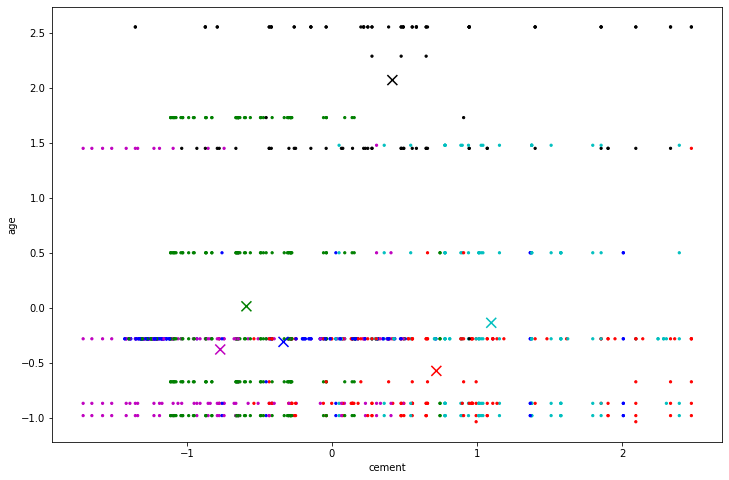

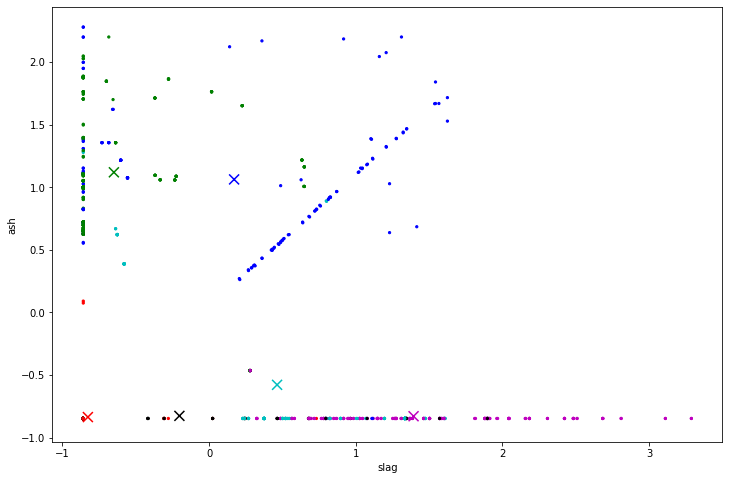

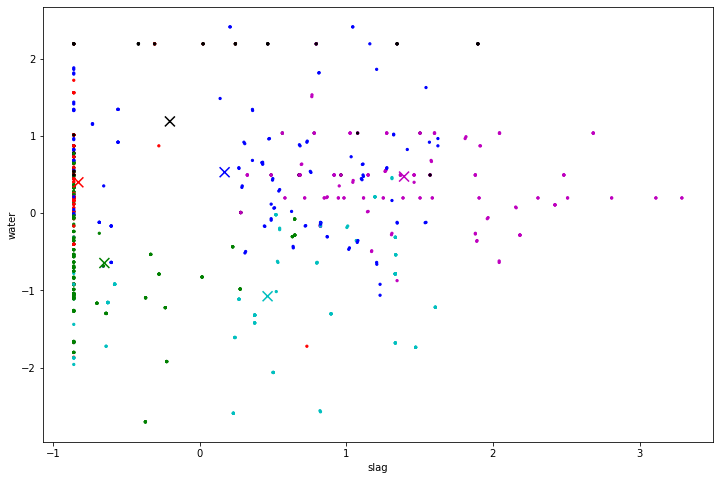

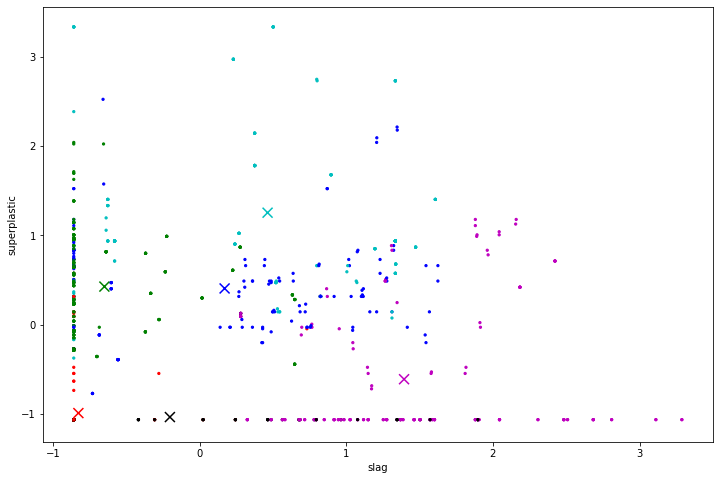

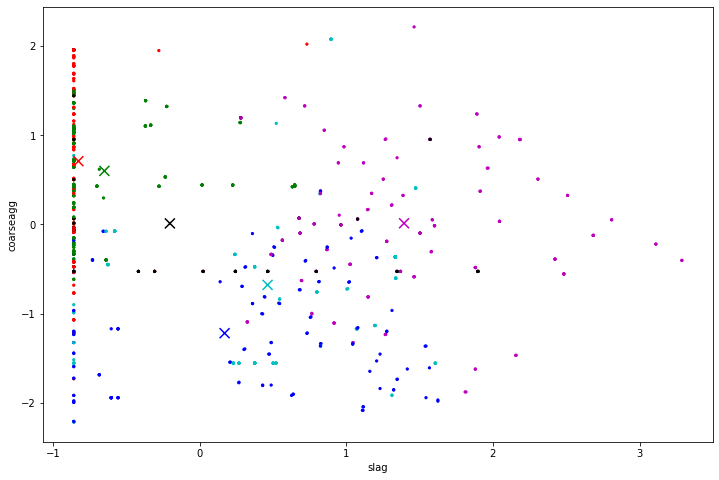

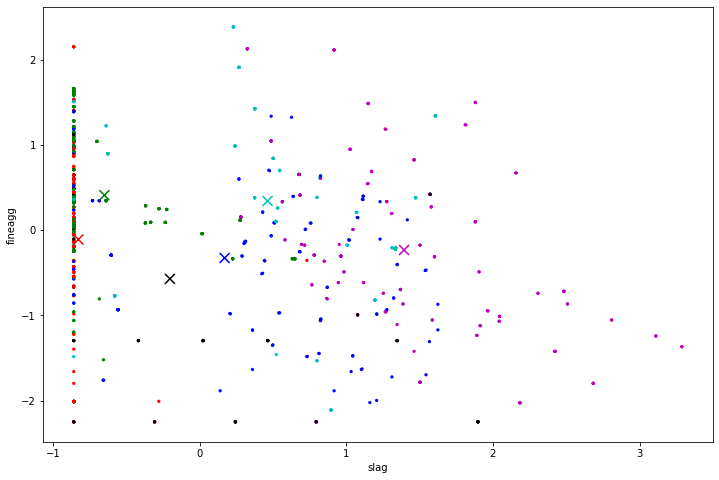

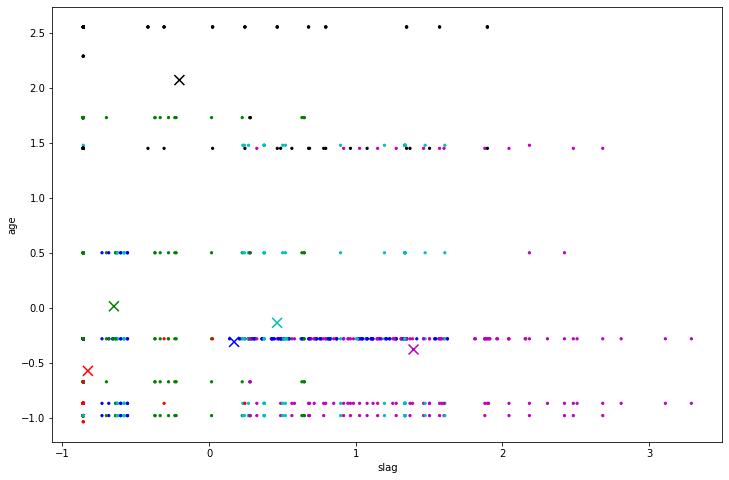

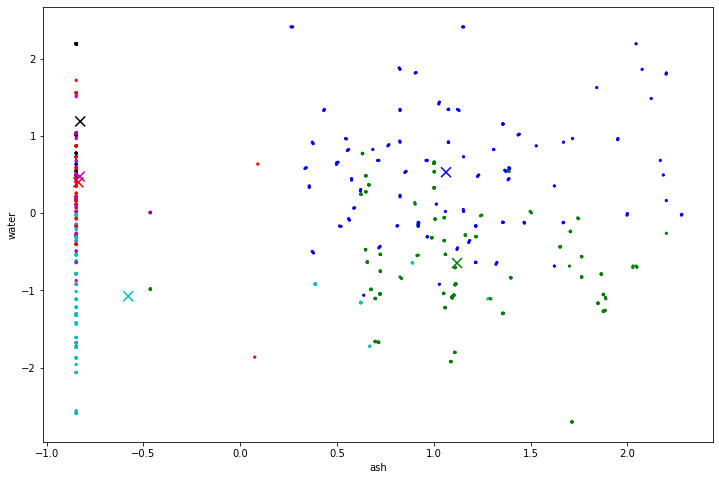

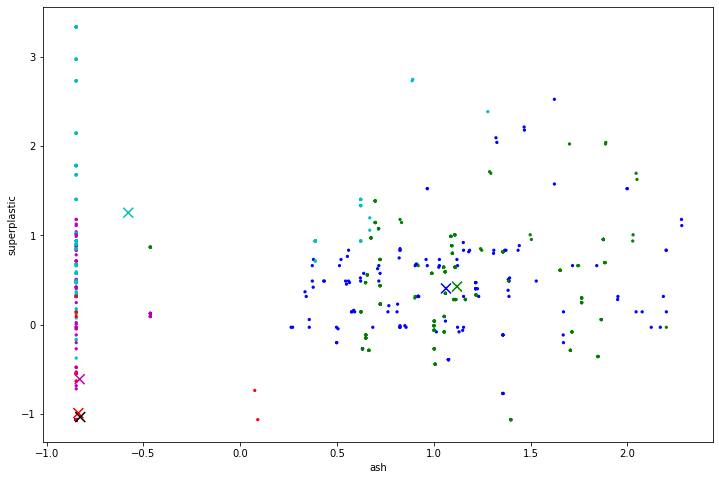

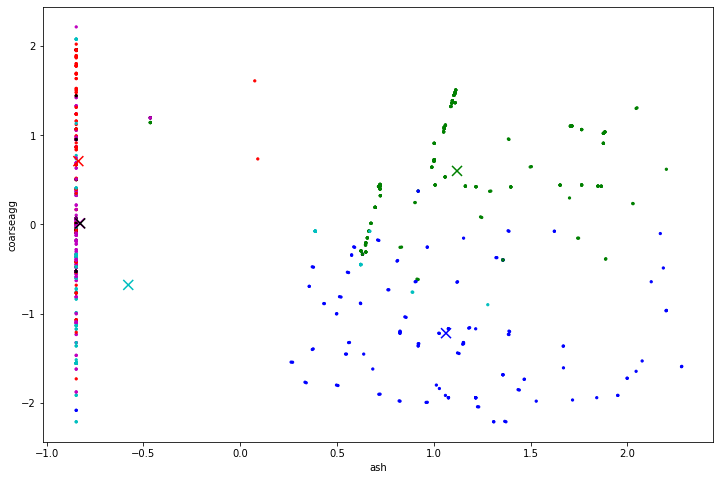

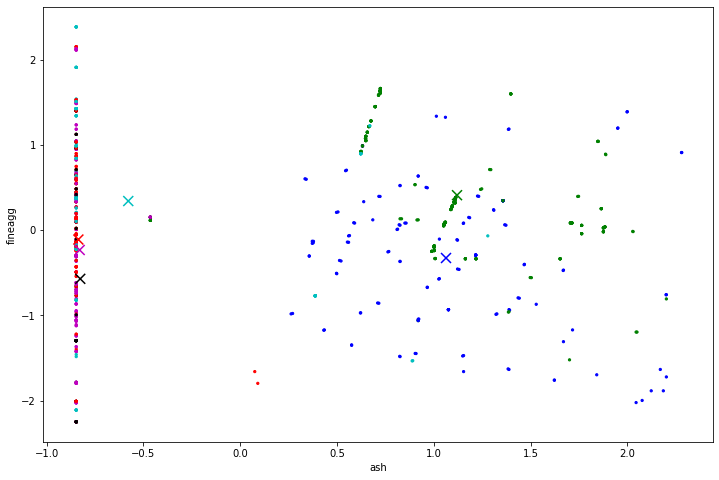

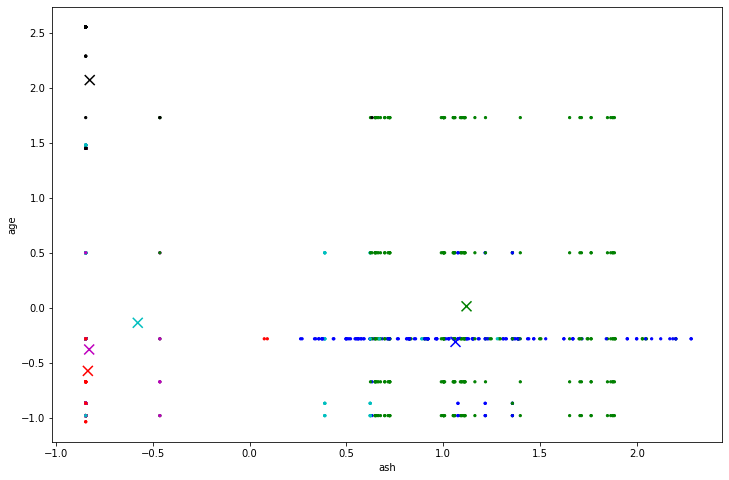

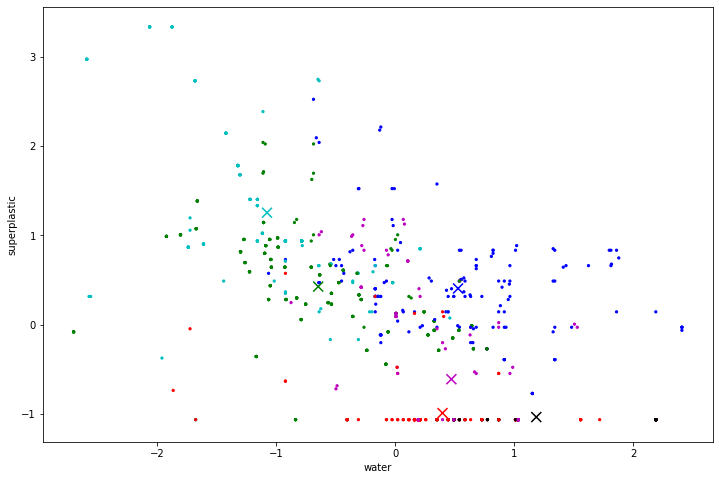

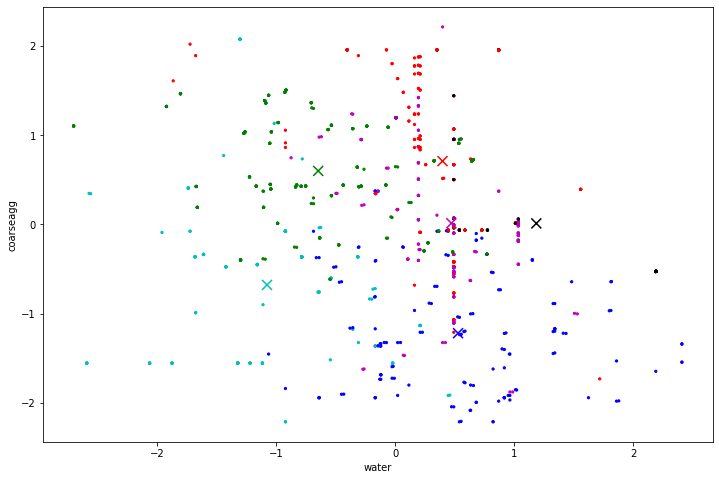

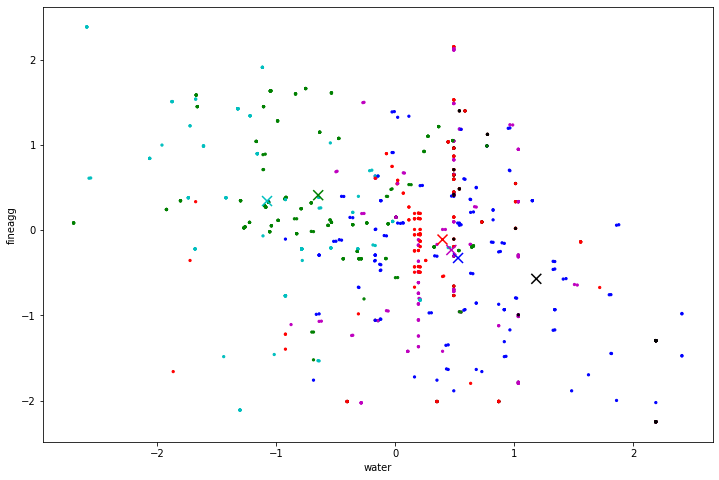

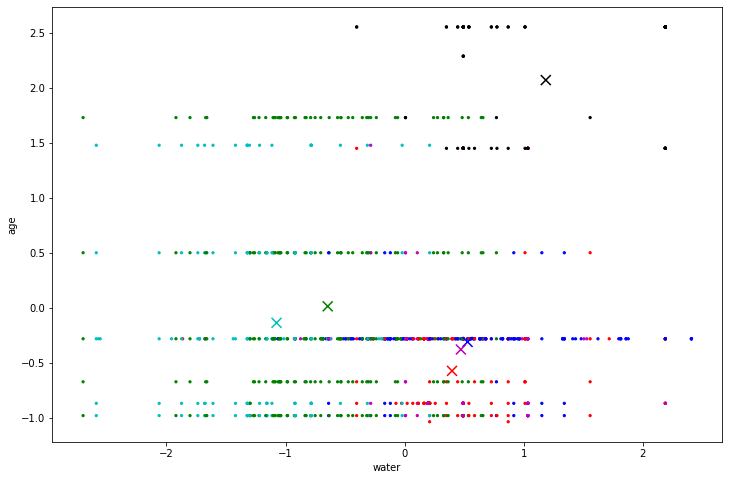

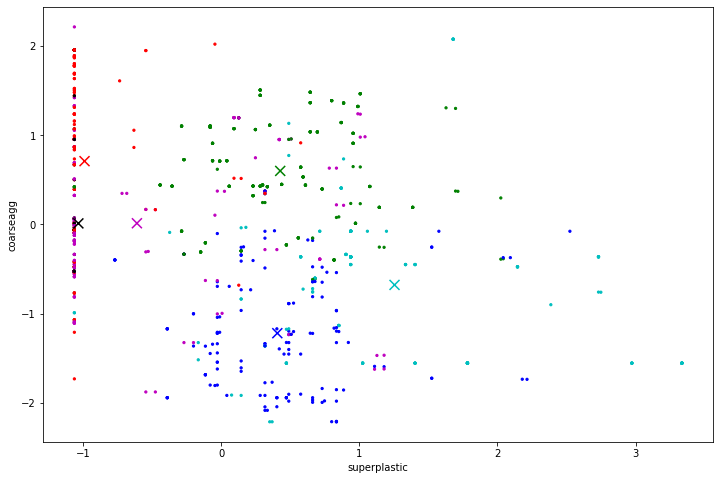

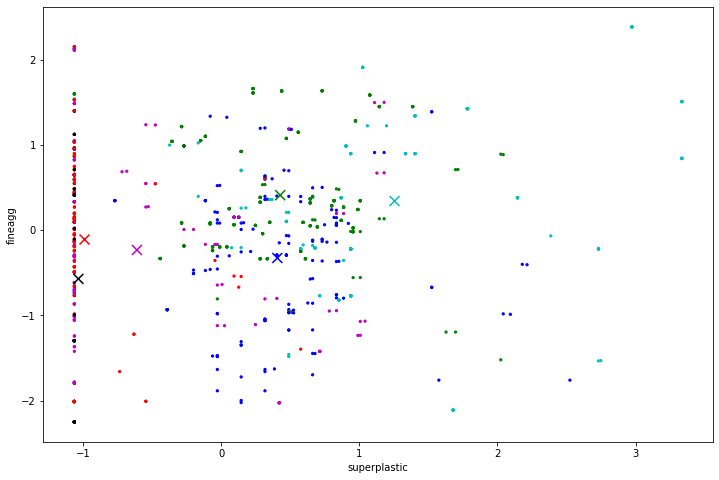

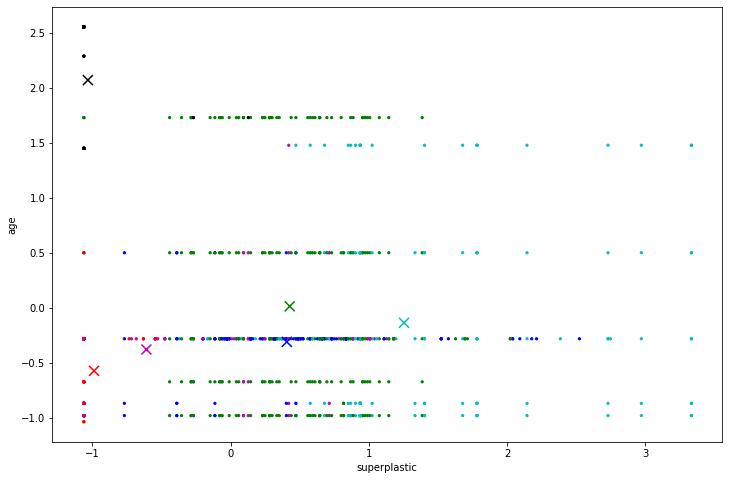

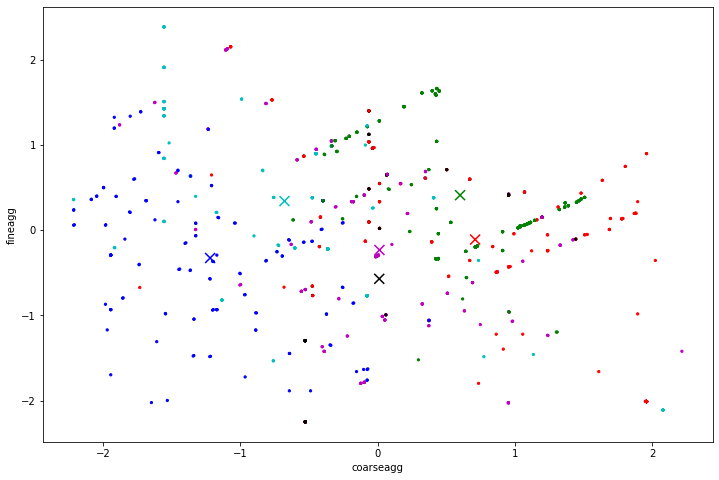

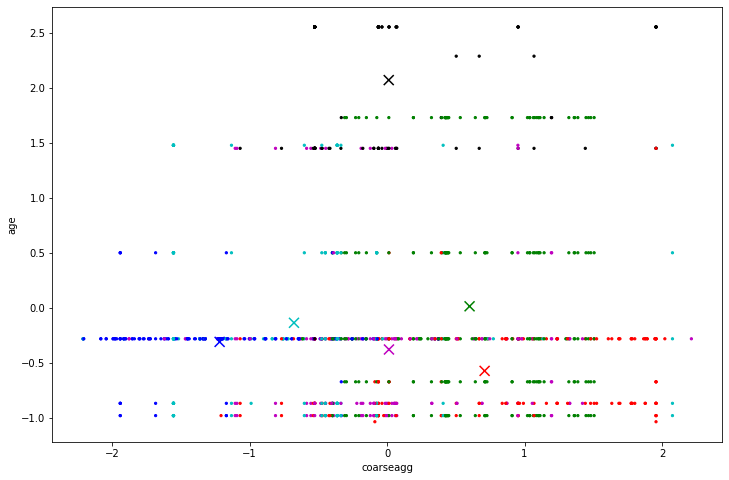

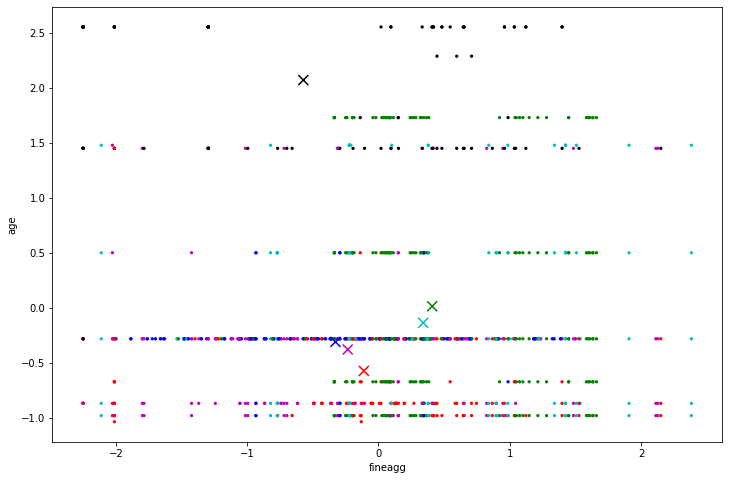

In [241]:
#The elbow seems to be at k=6 (From here on, drop in inertia per unit increase in no. of clusters is less
# Taking this (6) as the optimum no. of clusters
dset_predictors=dset_z.drop(columns=['strength'])
kmeans = KMeans(n_clusters=6).fit(dset_predictors)
df_group_labels = pd.DataFrame(kmeans.labels_,columns=['group'])
df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=dset_predictors.columns)
#change colors to good definitions
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # permitted single alphabet
colors = ['r','b','g','c','m','k'] # for each of the six groups
for i in range(6):
    df_group_labels.loc[df_group_labels.group == i, 'group_color'] = colors[i]
print("        Graphs showing pairs of 7 predictor variables in 6 clusters with centroids ")
done=[]
for first in dset_predictors.columns:
    for second in dset_predictors.columns:
        if (first!=second and [second,first] not in done):
            plt.figure(figsize=(12,8))
            plt.scatter(dset_predictors[first],dset_predictors[second], c=df_group_labels['group_color'], s=5)
            plt.scatter(df_centroids[first], df_centroids[second], c=colors, marker='x', s=100)#, alpha=0.5)
            plt.xlabel(first)
            plt.ylabel(second)
            plt.show()
        done.append([first,second])




        Graphs showing dependent variable 'strength' with each of the 7 predictor variables
        in 6 clusters with centroids 


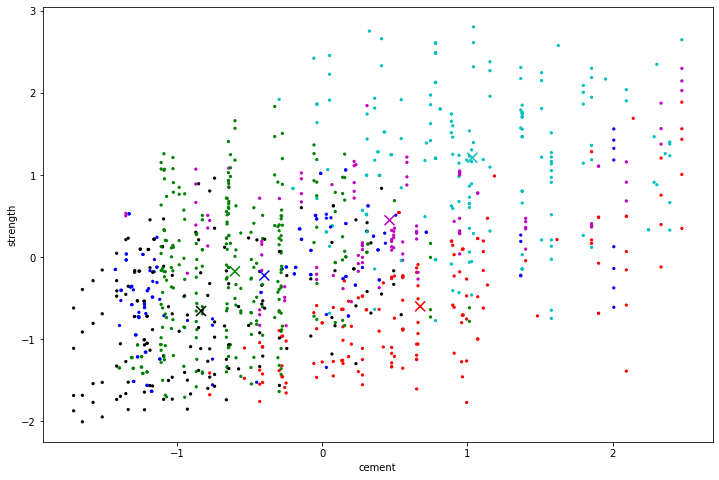

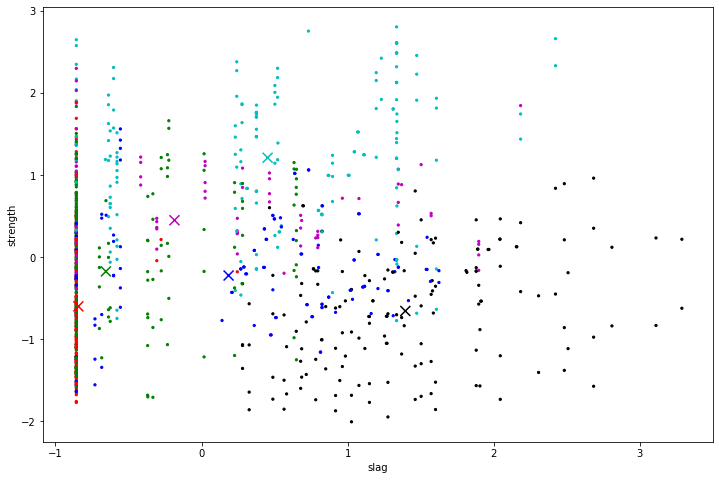

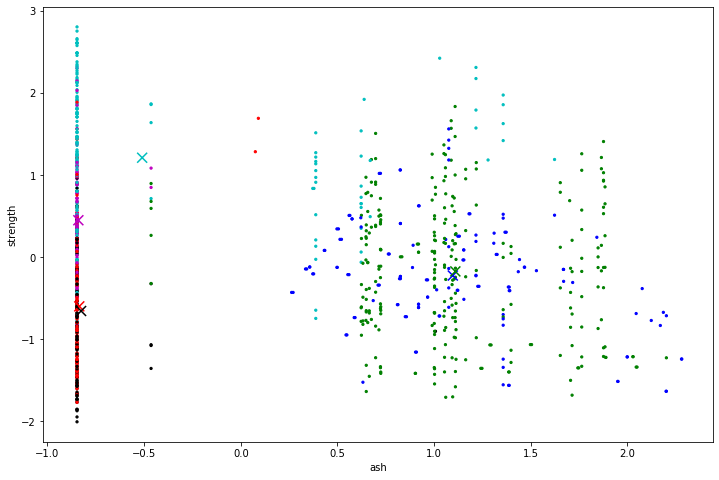

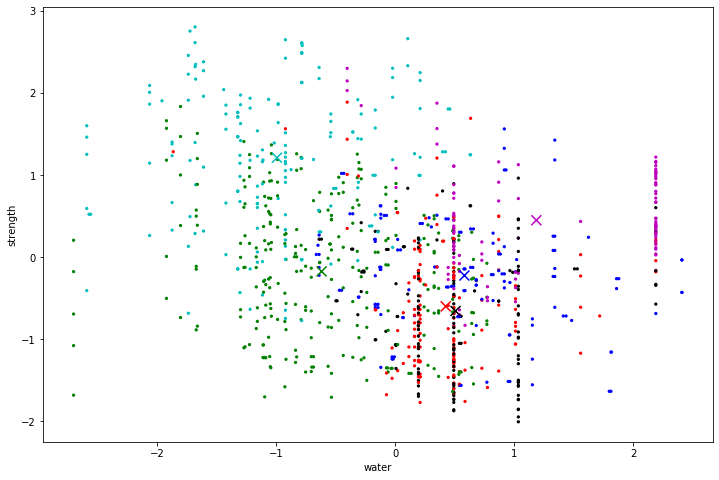

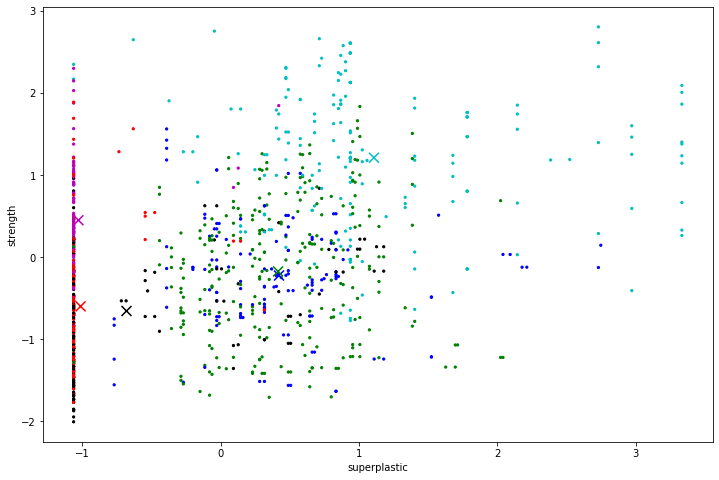

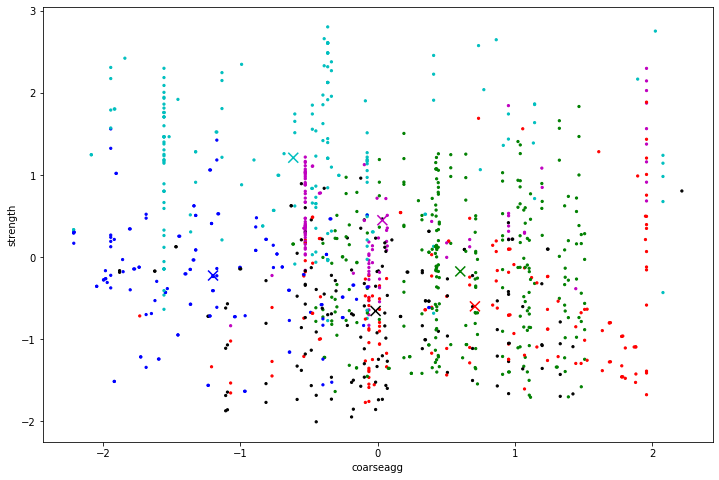

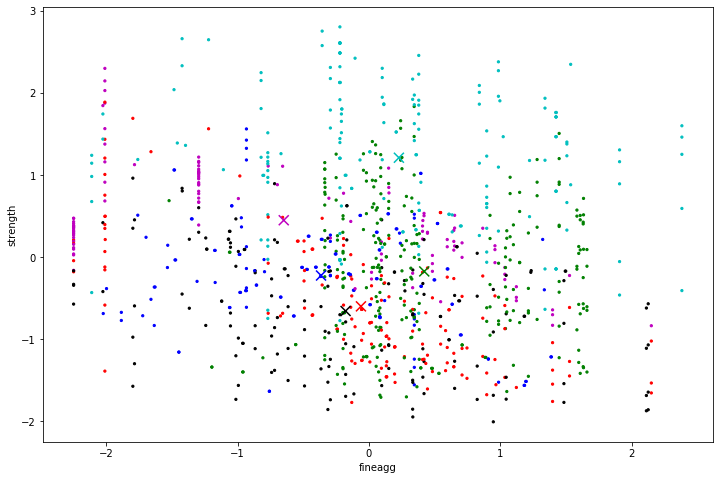

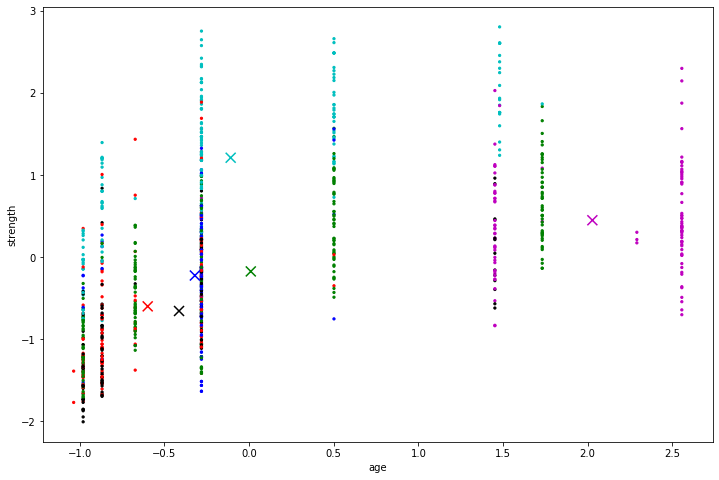

In [242]:
dset_strength=dset_z
kmeans = KMeans(n_clusters=6).fit(dset_strength)
df_group_labels = pd.DataFrame(kmeans.labels_,columns=['group'])
df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=dset_strength.columns)
#change colors to good definitions
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # permitted single alphabet
colors = ['r','b','g','c','m','k'] # for each of the six groups
for i in range(6):
    df_group_labels.loc[df_group_labels.group == i, 'group_color'] = colors[i]
print("        Graphs showing dependent variable 'strength' with each of the 7 predictor variables")
print("        in 6 clusters with centroids ")
second='strength'
for first in dset_predictors.columns:
    if (first!=second):
        plt.figure(figsize=(12,8))
        plt.scatter(dset_strength[first],dset_strength[second], c=df_group_labels['group_color'], s=5)
        plt.scatter(df_centroids[first], df_centroids[second], c=colors, marker='x', s=100)#, alpha=0.5)
        plt.xlabel(first)
        plt.ylabel(second)
        plt.show()

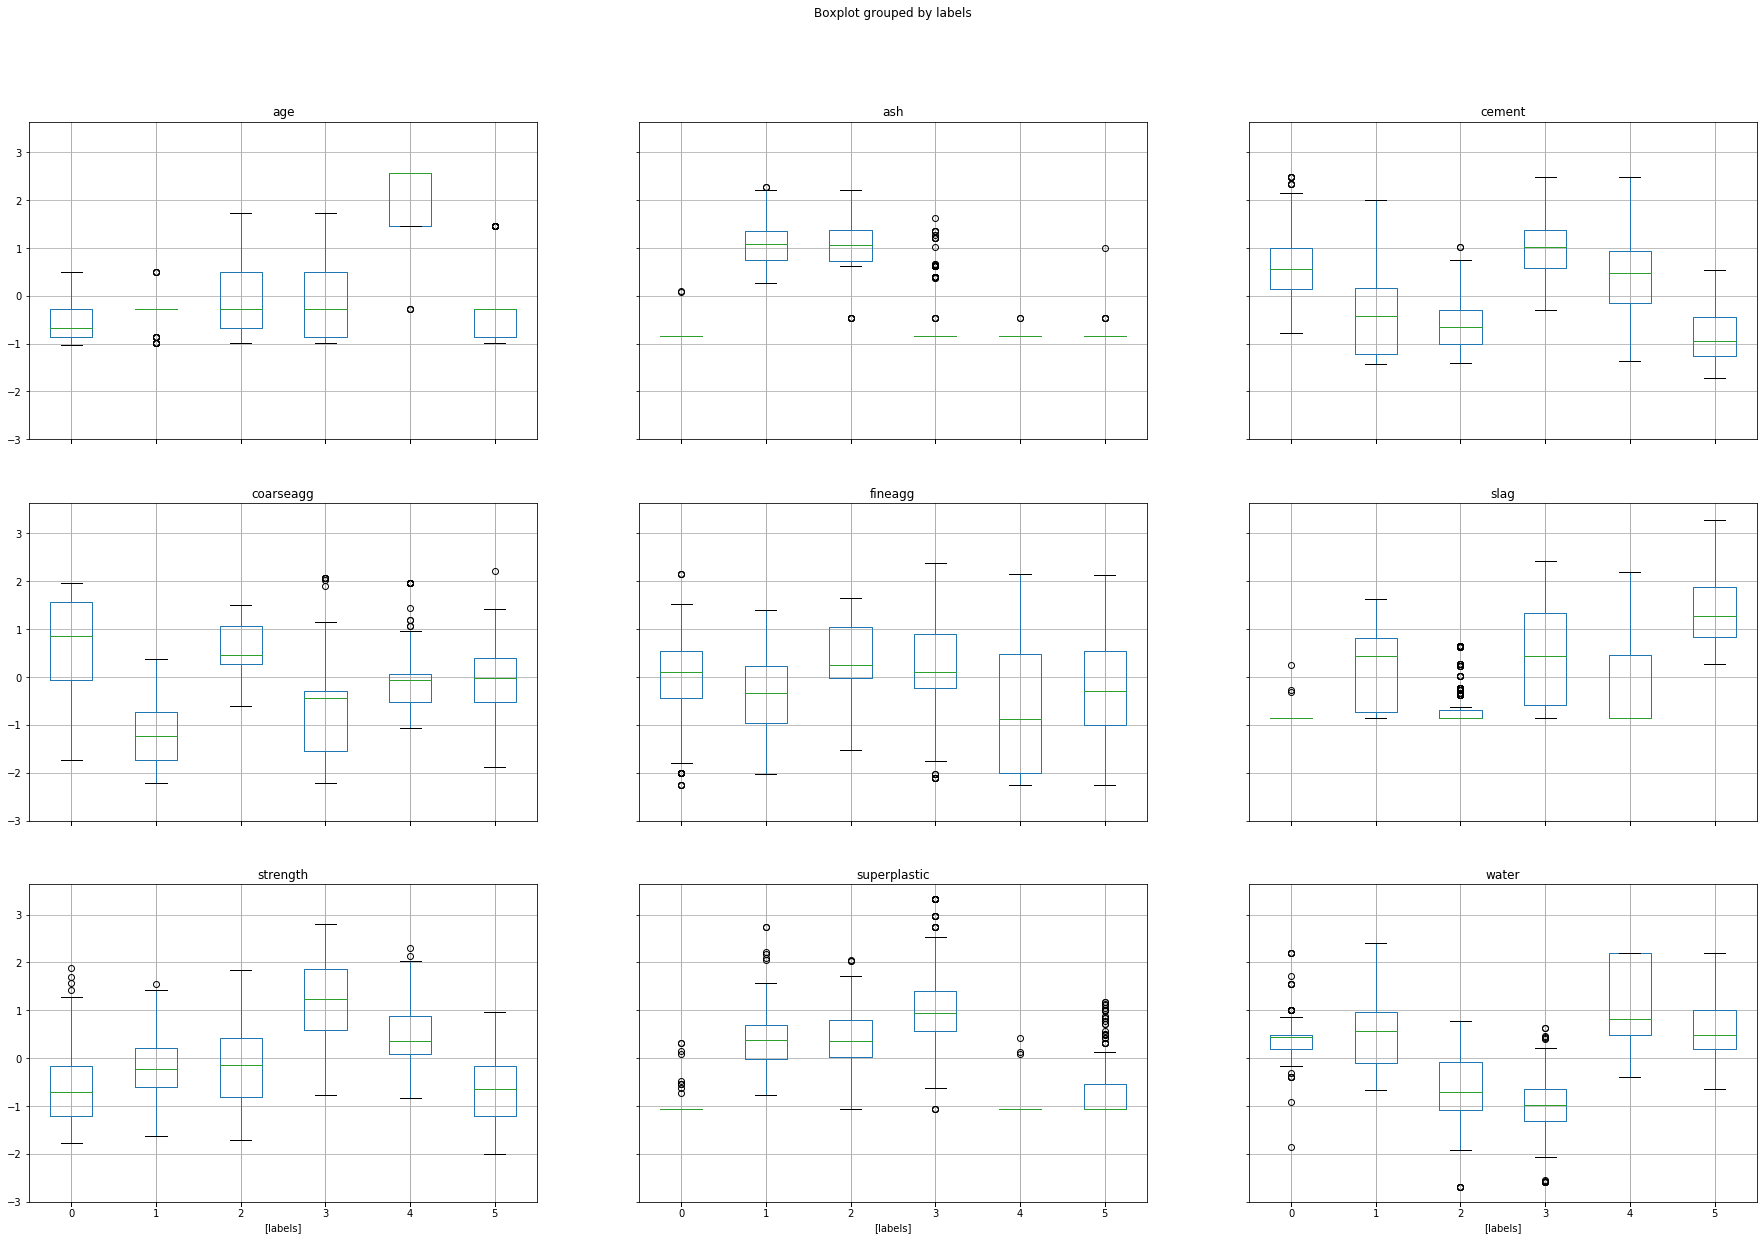

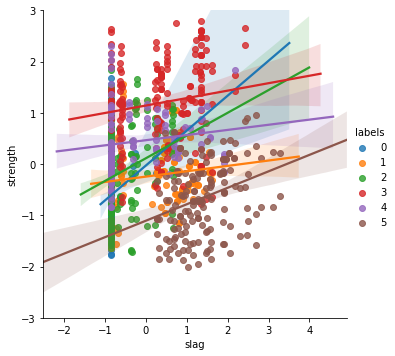

In [243]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
dataset_labeled = dataset.join(cluster_labels)
dataset_labeled1=dset_z.join(cluster_labels)
dataset_labeled1.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))
plot = sns.lmplot('slag','strength',data=dataset_labeled1,hue='labels')
plot.set(ylim = (-3,3))
#dataset_labeled1.head()

In [244]:
#Observations from all graphs:
#Graphs visually show the impact of each predictor variable on strength
#Wherever we see tight clusters (eg. relatively so in 'cement'), the impact of that variable on 'strength' is high
#No distinct clusters are visible at any number of clusters.
#The attributes seem to be weak predictors except for cement, which again, is marginally good.
#This was apparent in earlier analysis too, eg. in the correlation plots
#The potential of getting better results by breaking data into clusters is therefore low

4. Deliverable -4 (Tuning the model) 
a. Algorithms that you think will be suitable for this project 
b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit 

In [245]:
#Ensemble Techniques- RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

In [246]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [247]:
#Gradient Boosting Regressor
X2= dataset_z.drop(columns='strength' , axis = 1)
y=dataset_z['strength']
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=1)
gbmTree = GradientBoostingRegressor(n_estimators=100)
gbmTree.fit(X2_train,y_train)
gbm_tr_score=gbmTree.score(X2_train, y_train)
gbm_test_score=gbmTree.score(X2_test,y_test)
print("gbmTree on training" ,gbm_tr_score )
print("gbmTree on test data ",gbm_test_score)


gbmTree on training 0.8969347505010807
gbmTree on test data  0.8120155007302369


In [248]:
#BaggingRegressor
bgcl = BaggingRegressor(n_estimators=100, oob_score= True)
bgcl = bgcl.fit(X2_train,y_train)
bgcl_tr_score=bgcl.score(X2_train,y_train)
bgcl_test_score= bgcl.score(X2_test,y_test)
bgcl_oob_score=bgcl.oob_score_
print("bgcl on train data ", bgcl_tr_score)
print("bgcl on test data ",bgcl_test_score)
print("out of bag score" , bgcl_oob_score)

bgcl on train data  0.9709575183783498
bgcl on test data  0.845979875783242
out of bag score 0.8367883020781264


In [249]:
#Random Forest Regressor
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X2_train,y_train)
rf_tr_score= rfTree.score(X2_train,y_train)
rf_test_score= rfTree.score(X2_test,y_test)
print("rfTree on train data ",rf_tr_score)
print("rfTree on test data ",rf_test_score)


rfTree on train data  0.9703138735411416
rfTree on test data  0.8429006460362874


In [250]:
concrete_XY = X.join(y)
concrete_XY.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.601727 -0.847144  1.034976     -1.061968  -0.014398 -0.312618   
1 -1.074790 -0.367551  1.096078 -1.095618      0.800217   1.388141  0.285302   
2 -0.298384 -0.856971  0.648965  0.276070     -0.113633  -0.206121  1.100078   
3 -0.145209  0.465159 -0.847144  2.189833     -1.061968  -0.526517 -1.296616   
4 -1.209776  1.270035 -0.847144  0.554178      0.507095   0.958372 -0.961932   

        age  strength  
0 -0.281572 -0.355018  
1 -0.673017 -0.737108  
2 -0.281572 -0.395144  
3 -0.281572  0.600806  
4 -0.281572 -1.049727

4. Deliverable -4 
c. Model performance range at 95% confidence level 

In [251]:
# configure bootstrap with Gradient Boosting Regression
n_iterations = 1000
stats = list()

for i in range(n_iterations):
     
    #Resample the data
    concrete_XY_resample=resample(concrete_XY)
    
    #Splitting the data
    X1=concrete_XY_resample.drop(columns='strength')
    y1=concrete_XY_resample['strength']
    
    # prepare train and test sets
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.30,random_state=10)
          
   # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    gbmTree.fit(X1_train, y1_train)   # fit against independent variables and corresponding target values
    
    # evaluate model
    predictions = gbmTree.predict(X1_test)   # predict based on independent variables in the test data
    score = gbmTree.score(X1_test , y1_test)

    stats.append(score)
    #print(score)
bootstrap_gbm_score=score.mean()
print ('the mean score after applying bootstrapping with Gradient Boosting is: ',bootstrap_gbm_score)

the mean score after applying bootstrapping with Gradient Boosting is:  0.9012594005856506


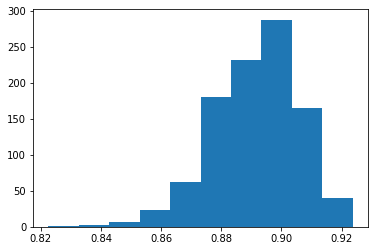

          Shapiro stat and p: stat=0.980, p=0.000


In [252]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
stat, p = shapiro(stats)
print('          Shapiro stat and p: stat=%.3f, p=%.3f' % (stat, p))

In [253]:
print('         We see the scores from 1000 times randomly split training data showing a normal distribution')
print('         The Shapiro test for normality also gives p=0.003, low enough to confirm normality')
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('       model score for two sided ', alpha*100, '% confidence interval is between', lower*100,'%',' and ',upper*100,'%')

         We see the scores from 1000 times randomly split training data showing a normal distribution
         The Shapiro test for normality also gives p=0.003, low enough to confirm normality
       model score for two sided  95.0 % confidence interval is between 85.95705399043749 %  and  91.55691427226758 %


In [254]:
# configure bootstrap for Random Forest Regressor
stats1 = list()
for i in range(n_iterations):
    n_iterations = 1000 
    #Resample the data
    concrete_XY_resample=resample(concrete_XY)
    
    #Splitting the data
    X1=concrete_XY_resample.drop(columns='strength')
    y1=concrete_XY_resample['strength']
    
    # prepare train and test sets
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.30,random_state=10)
   
    # fit model
    rfTree = RandomForestRegressor(n_estimators=50)  
    rfTree.fit(X1_train, y1_train)   # fit against independent variables and corresponding target values

    # evaluate model
    predictions = rfTree.predict(X1_test)   # predict based on independent variables in the test data
    score = rfTree.score(X1_test , y1_test)

    stats1.append(score)
    #print(score)

bootstrap_rf_score=score.mean()
print ('the mean score after applying bootstrapping with Random Forest Regressor is: ',bootstrap_rf_score)
#the running time for the above model is atleast 3-4 minutes.

the mean score after applying bootstrapping with Random Forest Regressor is:  0.9349563357564277


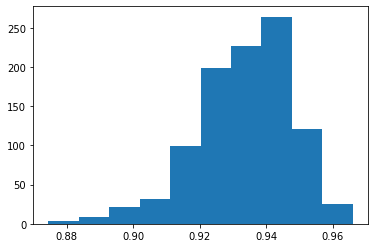

          Shapiro stat and p: stat=0.973, p=0.000


In [256]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats1)
pyplot.show()
stat, p = shapiro(stats1)
print('          Shapiro stat and p: stat=%.3f, p=%.3f' % (stat, p))


In [257]:
print('       Scores from 1000 times randomly split training data using Randomforest model shows a normal distribution')
print('       The Shapiro test for normality also gives p=', p, 'low enough to confirm normality')
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('       model score for two sided ', alpha*100, '% confidence interval is between', lower*100,'%',' and ',upper*100,'%')


       Scores from 1000 times randomly split training data using Randomforest model shows a normal distribution
       The Shapiro test for normality also gives p= 1.4716831269259711e-12 low enough to confirm normality
       model score for two sided  95.0 % confidence interval is between 85.95705399043749 %  and  91.55691427226758 %


#                              Model Tuning using hyper parameters

In [258]:
#Use RandomsearchCV find the best parameters for RandomforestRegressor.
#Build the model with best parameters and report the score

In [259]:
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)

In [260]:
#getting the original parameters in use
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# RandomSearchCV

In [261]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [262]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [263]:
# Use the random grid to search for best hyperparameters(K-Fold used for cross validation)
from sklearn.model_selection import KFold
n_iterations = 5 
kf = KFold(n_splits=5) # k-fold validation with k=5(k=5 and k=10 are giving same accuracy)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kf, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
X=concrete_XY_resample.drop(columns='strength')
y=concrete_XY_resample['strength']
# prepare train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    4.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.1s finished


In [264]:
print("Best tuned hyper-parameters:")
rf_random.best_params_

Best tuned hyper-parameters:


{'n_estimators': 15,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': False}

In [265]:
best_random = rf_random.best_estimator_   # best ensemble model (with optimal combination of hyperparameters)

In [266]:
rand_ser_cv_tr_score=best_random.score(X_train , y_train)
print(" score of best randomized model with tuned hyperparameters on training data using RandomSearch:", rand_ser_cv_tr_score)

 score of best randomized model with tuned hyperparameters on training data using RandomSearch: 0.9964487272242261


In [267]:
rand_ser_cv_score=best_random.score(X_test , y_test)
print(" score of best randomized model with tuned hyperparameters using RandomSearch:", rand_ser_cv_score)

 score of best randomized model with tuned hyperparameters using RandomSearch: 0.943658718400735


In [268]:
# This is the best the randomizedsearchCV can give with the range of values we submitted. The Score is highest among all the 
#regressors.

# GridSearcCV

In [269]:
#Use the GridSearchCV and find the best hyper parameters for RandomeForestRegressor
#Build the model with best parameters and report the score
from sklearn.model_selection import GridSearchCV

In [270]:
#Defining hyperparameters
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [271]:
rf = RandomForestRegressor(random_state = 1)

In [272]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [273]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [274]:
print("Best tuned hyper-parameters:")
grid_search.best_params_

Best tuned hyper-parameters:


{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 7}

In [275]:
# best ensemble model (with optimal combination of hyperparameters)
print("best model from randomized search with tuned hyperparameters")
best_grid = grid_search.best_estimator_
print(best_grid)

best model from randomized search with tuned hyperparameters
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


In [276]:
grid_rf_tr_score=best_grid.score(X_train, y_train)
print("score of random forest model with tuned hyperparameters using GridSearch on training data:",grid_rf_tr_score)

score of random forest model with tuned hyperparameters using GridSearch on training data: 0.8890457423520451


In [277]:
grid_rf_score=best_grid.score(X_test, y_test)
print("score of random forest model with tuned hyperparameters using GridSearch:",grid_rf_score)

score of random forest model with tuned hyperparameters using GridSearch: 0.8190591338195863


Final Result:Which is the best???

In [278]:
result = pd.DataFrame({'Type of Model' : ['GridSearch CV', 'RandomSearch Cv','bootstrap with Random Forest Regressor',
                                         'bootstrap with Gradient Boosting Regression','Random Forest Regressor','BaggingRegressor',
                                         'Gradient Boosting Regressor','Polynomial Features','linear regression',
                                         ' Score on training set after deleting the column','Score on training set before deleting the columns'],
                      'Train Data' : [grid_rf_tr_score,rand_ser_cv_tr_score,'-','-',rf_tr_score,bgcl_tr_score,gbm_tr_score,
                                      poly_tr_score,'-',training_score1,training_score],
                                       
                      'Test Data' : [grid_rf_score,rand_ser_cv_score,bootstrap_rf_score,bootstrap_gbm_score,rf_test_score,bgcl_test_score,
                                     gbm_test_score,poly_test_score,linear_score,test_score1,test_score]  
                       
                      })

In [279]:
result

Type of Model Train Data  Test Data
0                                       GridSearch CV   0.889046   0.819059
1                                     RandomSearch Cv   0.996449   0.943659
2              bootstrap with Random Forest Regressor          -   0.934956
3         bootstrap with Gradient Boosting Regression          -   0.901259
4                             Random Forest Regressor   0.970314   0.842901
5                                    BaggingRegressor   0.970958   0.845980
6                         Gradient Boosting Regressor   0.896935   0.812016
7                                 Polynomial Features    0.65327   0.617196
8                                   linear regression          -   0.608816
9     Score on training set after deleting the column   0.991676   0.739955
10  Score on training set before deleting the columns   0.994568   0.759615

In [105]:
#we see that RandomSearch Cv is the best model for the data followed by bootstrap with Random Forest Regressor 
#RandomSearch Cv is better than GridSearch CV as seen in the model tests
#The scores with polynomial features are not upto the mark. Hence for this data polynomial features is not required